In [ ]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import jieba as jb
import re
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable

In [ ]:
# training history
# label histogram
# accuracy histogram
# t-sne

# Data Loading

In [ ]:
pop = pd.read_csv('data_popular_3.csv')
pop1 = pop.drop(["id", "forumAlias", "commentCount", "likeCount", "createdAt", "excerpt"], axis=1)
label = [1] * pop1.shape[0]
pop1['label'] = label
pop1

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,True,True,F,心情,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,True,True,F,感情,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,True,True,F,心情,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,True,True,F,心情,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
559,原來是鹹的,https://megapx-assets.dcard.tw/images/29fef7b3...,False,False,M,VTuber,"['VTuber', 'hololive', 'hololiveEN']",1
560,#分享 theqoo熱門 擅長綜藝的男女偶像TOP2,* 以原PO主觀標準來看的 *\n\n男偶像代表——EXO伯賢\n\n↓\nhttps://...,False,True,F,追星,"['追星', 'SHINee', 'SEVENTEEN', 'ohmygirl', '美珠']",1
561,-近期用餐心得20間濃縮版本(2022/06),一個月內的餐廳(喜歡的小吃)心得濃縮版。\n※業配風波請不要延燒到我這裡，文章內寫不好吃還問...,False,False,F,美食,"['食記', '台北美食']",1
562,10家必吃！網購甜點 不藏私大公開?,安安！我是77??\n第一次在美食版發文有點緊張><\n本身非常愛吃美食還有甜點\n今天來開...,False,False,F,美食,"['網購', '甜點', '食記', '美食', '吃貨']",1


In [ ]:
pop1[4:10]

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
5,#贈品 今天抽一位贈送星巴克,今天租到房子蠻開心的\n心情好就想送東西??\nhttps://i.imgur.com/qv...,False,False,M,省錢,"['贈送', '星巴克', '省錢', '情報', '抽獎']",1
6,Dr.Wu包裝先別丟??～,目前沒有回收瓶活動喔！！（下文語意修正）\n是包裝雷射標籤累積活動??\n\n（購買商品的包...,False,False,F,美妝,"['保養', '分享']",1
7,大家有被某間店店員記住的經驗嗎！,我是被超商店員記住的?????♀?\n\n因為打工下班的時間已經晚上十一點了\n遇到的店員也...,False,True,F,閒聊,"['有趣', '店員', '生活']",1
8,不愧是未成年大哥 砍人風波過了ig就開放,https://i.imgur.com/yxGvvMX.jpg\nhttps://i.img...,True,True,M,心情,[],1
9,最心疼的生日禮物,上個月我的生日當天接到了工地福利社大姐打來的電話跟我說門口被丟了一窩小貓怎麼辦\n還能怎麼辦...,False,False,F,寵物,"['貓', '領養不棄養', '奶貓', '寵物', '貓咪真的很可愛']",1


In [ ]:
notp = pd.read_csv('data_notpopular_3.csv')
notp1 = notp.drop(["id", "forumAlias", "commentCount", "likeCount", "createdAt", "excerpt"], axis=1)
label = [0] * notp1.shape[0]
notp1['label'] = label
notp1

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,無法接受朋友嫁給工人,我和閨蜜a家境都算不錯\n我們倆從小就讀知名國際學校\n朋友圈也都差不多\n大家也常常帶另一...,True,True,F,心情,[],0
1,看熱鬧的小孩撿角,如題，最近還多廟會活動，無意間聽到身邊的長輩說，看熱鬧的小孩這輩子真的撿角，我心裡想說，小朋...,False,True,F,閒聊,"['廟會', '閒聊', '台灣', '時事', '生活']",0
2,渣男,此篇文章為轉貼文章，請更新至最新版本觀看完整內容。,True,True,F,感情,"['渣男', '新竹', '感情', '交友軟體', '女孩']",0
3,男生都愛臭婊子,臭婊男生平常罵歸罵\n其實還是最喜歡這種的吧\n不然為什麼男友一邊說\n我是很乖很棒的女生\...,True,True,F,感情,[],0
4,#開箱 NARUKO茶樹抗痘粉刺寶-消腫痘救星?,NaN,False,False,F,美妝,"['開箱', '茶樹', '保養', '抗痘']",0
...,...,...,...,...,...,...,...,...
562,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,False,False,M,考試,"['考試', '高醫', '北醫', '醫學', '學測']",0
563,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,False,False,F,閒聊,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
564,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,False,True,M,戲劇綜藝,"['營業中', '顏佑庭']",0
565,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,False,False,F,中國明星,"['中國明星', '抖音', '小紅書']",0


In [ ]:
df = pd.concat([pop1,notp1], ignore_index=True)
df

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,True,True,F,心情,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,True,True,F,感情,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,True,True,F,心情,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,True,True,F,心情,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
1126,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,False,False,M,考試,"['考試', '高醫', '北醫', '醫學', '學測']",0
1127,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,False,False,F,閒聊,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
1128,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,False,True,M,戲劇綜藝,"['營業中', '顏佑庭']",0
1129,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,False,False,F,中國明星,"['中國明星', '抖音', '小紅書']",0


In [ ]:
pd.concat([df[4:7],df[1008:1011]])

,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
5,#贈品 今天抽一位贈送星巴克,今天租到房子蠻開心的\n心情好就想送東西??\nhttps://i.imgur.com/qv...,False,False,M,省錢,"['贈送', '星巴克', '省錢', '情報', '抽獎']",1
6,Dr.Wu包裝先別丟??～,目前沒有回收瓶活動喔！！（下文語意修正）\n是包裝雷射標籤累積活動??\n\n（購買商品的包...,False,False,F,美妝,"['保養', '分享']",1
1008,#詢問多那之工作,想請問推薦去多那之打工嗎～\n爬文過幾乎都是幾年前的留言\n身邊朋友也都沒有相關經歷可以參考...,True,True,F,工作,"['工作', '工作經驗', '打工', '面試', '求職']",0
1009,突然覺得好迷茫,前女友是在交友軟體認識的，聊天過程蠻開心的，一段時間我們也約出來聊聊天，我對她也蠻有好感的，...,True,True,M,感情,"['迷茫', '感情', '分手', '失戀', '出軌']",0
1010,#國小 請問桃園英語教甄 數學複試,各位前輩們好???♀?\n請問在進行數學複試時，能否打開課本上課。\n（看著課本裡的數學題目...,False,True,F,教師,"['桃園', '英語', '教甄']",0


# Data Preprocessing

In [ ]:
#drop nan
print(df.isnull().sum())
df1=df.dropna()
df1

title                   0
content                54
anonymousSchool         0
anonymousDepartment     0
gender                  0
forumName               0
topics                  0
label                   0
dtype: int64


,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,True,True,F,心情,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,True,True,F,感情,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,True,True,F,心情,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,True,True,F,心情,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,False,False,M,YouTuber,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
1126,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,False,False,M,考試,"['考試', '高醫', '北醫', '醫學', '學測']",0
1127,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,False,False,F,閒聊,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
1128,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,False,True,M,戲劇綜藝,"['營業中', '顏佑庭']",0
1129,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,False,False,F,中國明星,"['中國明星', '抖音', '小紅書']",0


In [ ]:
# one label encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for col in df1[['anonymousSchool','anonymousDepartment','gender', 'forumName']]:
  df1[col]=le.fit_transform(df1[col])
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,好瞎==這算虐待動物吧,更4 B734 \n-\n更3\n雖然整件事讓人氣憤 但希望大家還是保持理性 就事論事 不要...,1,1,1,42,['虐待動物'],1
1,男友說要禁欲了?哭啊！？,我的的男友，跟我一起破處後，還來不及享受愛愛帶來的快感，就被突然襲來的焦慮嚇到跟我說他要禁欲...,1,1,1,44,"['男友', '哭']",1
2,H漫網頁被班上喜歡的男同學看到…..,在高三停課的前一週\n班上（坐在我前的男同學）突然有事要聯絡爸爸，但他匆忙出門沒帶手機\n\...,1,1,1,42,"['心事', '女生', '靠北', '閒聊', '男生']",1
3,意外發現高中朋友當初過世是假的,現在的心情真的很複雜，就像當初聽到她過世的消息一樣突然，事情發生在兩年前，\n前一天晚上她打...,1,1,1,42,"['朋友', '心事']",1
4,本週連續3位網紅與政府槓上,因為連續看到3位網紅與政府槓上\r\n所以發這篇文\r\n以下按照youtube上傳影片時間...,0,0,2,17,"['博恩', 'cheap', 'bump', '機車', '政府']",1
...,...,...,...,...,...,...,...,...
1126,高醫醫學or北醫牙醫,小弟是南部人，今年有幸正取高醫醫學與北醫牙醫，懇請各路大神給點建議（這兩個選擇的利與弊），感...,0,0,2,98,"['考試', '高醫', '北醫', '醫學', '學測']",0
1127,富邦防疫險*隔離*理賠,因為同住家人確診 所以我們被匡列隔離3+4\n我們是保富邦的 請問有人已理賠隔離費用的嗎！需...,0,0,1,123,"['富邦', '防疫險', '隔離', '閒聊', 'COVID19']",0
1128,營業中 顏佑庭,只有我覺得他是被煞到嗎？\n好像六神無主一樣\n送個小碗就那麼兩桌，錢姐桌、棒球桌\n這樣都...,0,1,2,46,"['營業中', '顏佑庭']",0
1129,有人知道他是誰嗎？,很常出現在抖音裡的一群男模走秀！？\n只找到一些關鍵字?中模經紀?\n附上照片 從影片中擷取...,0,0,1,18,"['中國明星', '抖音', '小紅書']",0


## 清理文字

In [ ]:
#刪除字母、數字和中文以外的字
def remove_punctuation(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(u"[^a-zA-Z0-9\u4E00-\u9FA5]")
    line = rule.sub('',line)
    return line

#刪除一些無意義的常用詞(stopword)
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords  


stopwords = stopwordslist("stopword.txt")

In [ ]:
#刪除字母、數字和中文以外的字
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(remove_punctuation)
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(remove_punctuation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


清除網址、'B##'和'\n'

In [ ]:
def remove_url(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:-]*')
    line = rule.sub('',line)
    return line
    
def remove_other(line):
    line = str(line)
    if line.strip()=='':
        return ''
    rule = re.compile(r'\n|B[0-9-]*')
    line = rule.sub('',line)
    return line

In [ ]:
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(remove_url)
  df1[col] = df1[col].apply(remove_other)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


分離字詞，並過濾無意義的常用詞(stopword)

In [ ]:
#分離字詞，並過濾無意義的常用詞(stopword)
for col in ['title','content', 'topics']:
  df1[col] = df1[col].apply(lambda x: " ".join([w for w in list(jb.cut(x)) if w not in stopwords]))
df1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,content,anonymousSchool,anonymousDepartment,gender,forumName,topics,label
0,瞎 這算 虐待 動物,4 3 整件事 人氣憤 希望 理性 事論 事 人身 攻擊 喔 2 有台 中 老 四川 店家 ...,1,1,1,42,虐待 動物,1
1,男友 禁欲 哭,男友 破處 還來 不及 享受 愛愛帶 快感 襲來 焦慮 嚇到 禁欲 三年 他會 幫 我記 月...,1,1,1,44,男友 哭,1
2,H 漫網 頁 班上 喜歡 男同學,高三 停課 前 一週 班上 坐在 我前 男同學 有事 爸爸 匆忙 出門 沒帶 手機 轉頭問 ...,1,1,1,42,心事 女生 靠北 閒聊 男生,1
3,意外 發現 高中 朋友 當初 過世是 假,心情 複 雜就 當初 聽 過世 消息 事情 發生 兩 年前 前一天 晚上 電話給 太晚 接到...,1,1,1,42,朋友 心事,1
4,本週 連續 3 位 網紅 政府 槓上,連續 3 位 網紅 政府 槓上 發 這篇文 youtube 上傳 影片 時間 排序 1STR...,0,0,2,17,博恩 cheapbump 機車 政府,1
...,...,...,...,...,...,...,...,...
1126,高醫 醫學 or 北醫牙醫,小弟 南部 有幸 正取 高醫 醫學 北醫牙 醫懇 請 各路 大神 給點 建議 這兩個 選擇 ...,0,0,2,98,考試 高 醫北醫 醫學學測,0
1127,富邦 防疫 險隔 離理 賠,同住 家人 確診 匡列 隔離 34 保富邦 請問 已理 賠隔 離費用 資料 時間 大概 多久 謝謝,0,0,1,123,富邦 防疫 險隔 離閒聊 COVID19,0
1128,營業 中 顏佑庭,我覺 煞 好像 六神 無主一樣 送個 小碗 兩桌 錢 姐桌 棒球 桌 送 錯桌 明明 指令 ...,0,1,2,46,營業 中 顏佑庭,0
1129,,很常 抖 音裡 一群 男模 走秀 只 找到 關鍵 字 中模 經紀 附上 照片 影片 中擷 取...,0,0,1,18,中國 明星 抖音 小紅書,0


In [ ]:
df_origin=df1
df1['content'] = df1['title']+ ' '+ df1['content'] + ' ' + df1['topics']
df1 = df1.drop(["title", "topics"], axis=1)
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,content,anonymousSchool,anonymousDepartment,gender,forumName,label
0,瞎 這算 虐待 動物 4 3 整件事 人氣憤 希望 理性 事論 事 人身 攻擊 喔 2 有台...,1,1,1,42,1
1,男友 禁欲 哭 男友 破處 還來 不及 享受 愛愛帶 快感 襲來 焦慮 嚇到 禁欲 三年 他...,1,1,1,44,1
2,H 漫網 頁 班上 喜歡 男同學 高三 停課 前 一週 班上 坐在 我前 男同學 有事 爸爸...,1,1,1,42,1
3,意外 發現 高中 朋友 當初 過世是 假 心情 複 雜就 當初 聽 過世 消息 事情 發生 ...,1,1,1,42,1
4,本週 連續 3 位 網紅 政府 槓上 連續 3 位 網紅 政府 槓上 發 這篇文 youtu...,0,0,2,17,1
...,...,...,...,...,...,...
1126,高醫 醫學 or 北醫牙醫 小弟 南部 有幸 正取 高醫 醫學 北醫牙 醫懇 請 各路 大神...,0,0,2,98,0
1127,富邦 防疫 險隔 離理 賠 同住 家人 確診 匡列 隔離 34 保富邦 請問 已理 賠隔 離...,0,0,1,123,0
1128,營業 中 顏佑庭 我覺 煞 好像 六神 無主一樣 送個 小碗 兩桌 錢 姐桌 棒球 桌 送 ...,0,1,2,46,0
1129,很常 抖 音裡 一群 男模 走秀 只 找到 關鍵 字 中模 經紀 附上 照片 影片 中擷 ...,0,0,1,18,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#shuffle data
from sklearn.utils import shuffle

df1=shuffle(df1)
df_origin=shuffle(df_origin)

In [ ]:
# train:test = (all-100):100
train = df1[100:]
test = df1[0:100]
all_data = df1
train

,content,anonymousSchool,anonymousDepartment,gender,forumName,label
583,尋貓 啟事 愛貓 走失 協尋無 晶片 無項 圈 未結 紮 回家 開門 時貓 咪 溜出 門後找...,0,1,1,37,0
1039,4 月 中 臨櫃 明台 防疫 險核 保情況 請問 4 月 中明台 防疫 險 現場 收件 最 ...,0,0,1,20,0
106,打給 賀哇 系鎖頭 httpsmegapxassetsdcardtwimages45d52c...,0,0,2,21,1
978,長 庚 科大 護理系 甄試 總成績 請 問長 庚 科大 護理系 林口 校區 學長 姐們 請問...,0,1,1,54,0
660,手傑基 洋基 球星 遭大聯盟 禁賽 1 場 體育 中心 綜合 報導前 美聯 MVP 洋基 明...,0,0,2,65,0
...,...,...,...,...,...,...
1118,心得 運動 腫脹 解 實測 方式 中 喜歡 運動 健身 女孩 討論 兩 年前 瘦身 朋友 健...,0,0,1,22,0
520,辛苦 一整天 隻 努力 微笑 超可愛的 海豹 httpsmegapxassetsdcardt...,0,0,2,63,1
984,確診 踢皮球 份 分享 也許 了解 台 中 台灣 防疫 姊姊 一家 三口 最小 女兒 確診 ...,0,0,1,29,0
1088,求健檢 httpsmegapxassetsdcardtwimagesc7b0f8f9f6ca...,0,1,1,101,0


In [ ]:
# TF-IDF
count_vect = CountVectorizer()
train_x = count_vect.fit_transform(train['content'])
test_x = count_vect.transform(test['content'])

tfidf_transformer = TfidfTransformer()
train_x = tfidf_transformer.fit_transform(train_x)
test_x = tfidf_transformer.transform(test_x)



In [ ]:
train_y=train['label'].to_numpy()
test_y=test['label'].to_numpy()
test_y.shape

#all
all_y=df1['label'].to_numpy()

# Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

nb=MultinomialNB()
lr=LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from prettytable import PrettyTable
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

### MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import train_test_split

In [ ]:
#transform to np array
x=train_x.toarray()
y=np.array(train_y)

test_x=test_x.toarray()

MLP1: 4 layer without dropout

In [ ]:
#MLP1

model1 = Sequential()
model1.add(Dense(128, input_dim=train_x.shape[1], activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_380 (Dense)           (None, 128)               3769088   
                                                                 
 dense_381 (Dense)           (None, 64)                8256      
                                                                 
 dense_382 (Dense)           (None, 32)                2080      
                                                                 
 dense_383 (Dense)           (None, 1)                 33        
                                                                 
Total params: 3,779,457
Trainable params: 3,779,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history1=model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 2s 44ms/step - loss: 0.6883 - accuracy: 0.5857 - val_loss: 0.6741 - val_accuracy: 0.7449
Epoch 2/15
22/22 [==============================] - 1s 35ms/step - loss: 0.5323 - accuracy: 0.9810 - val_loss: 0.5546 - val_accuracy: 0.7585
Epoch 3/15
22/22 [==============================] - 1s 36ms/step - loss: 0.1422 - accuracy: 0.9971 - val_loss: 0.4796 - val_accuracy: 0.7449
Epoch 4/15
22/22 [==============================] - 1s 35ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.5458 - val_accuracy: 0.7415
Epoch 5/15
22/22 [==============================] - 1s 35ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.5157 - val_accuracy: 0.7449
Epoch 6/15
22/22 [==============================] - 1s 37ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.5346 - val_accuracy: 0.7517
Epoch 7/15
22/22 [==============================] - 1s 35ms/step - loss: 8.7149e-04 - accuracy: 1.0000 - val_loss: 0.5421 - val_accuracy: 0.7517
Epoch 8/1

MLP2: 4 layer with dropout

In [ ]:
#MLP2

model2 = Sequential()
model2.add(Dense(128, input_dim=train_x.shape[1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_119"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_384 (Dense)           (None, 128)               3769088   
                                                                 
 dropout_176 (Dropout)       (None, 128)               0         
                                                                 
 dense_385 (Dense)           (None, 64)                8256      
                                                                 
 dropout_177 (Dropout)       (None, 64)                0         
                                                                 
 dense_386 (Dense)           (None, 32)                2080      
                                                                 
 dropout_178 (Dropout)       (None, 32)                0         
                                                                 
 dense_387 (Dense)           (None, 1)              

In [ ]:
#compile
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history2=model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 2s 45ms/step - loss: 0.6929 - accuracy: 0.5095 - val_loss: 0.6920 - val_accuracy: 0.4966
Epoch 2/15
22/22 [==============================] - 1s 35ms/step - loss: 0.6809 - accuracy: 0.6354 - val_loss: 0.6829 - val_accuracy: 0.5782
Epoch 3/15
22/22 [==============================] - 1s 35ms/step - loss: 0.6357 - accuracy: 0.7321 - val_loss: 0.6458 - val_accuracy: 0.7075
Epoch 4/15
22/22 [==============================] - 1s 34ms/step - loss: 0.4868 - accuracy: 0.8814 - val_loss: 0.5822 - val_accuracy: 0.7075
Epoch 5/15
22/22 [==============================] - 1s 35ms/step - loss: 0.2607 - accuracy: 0.9531 - val_loss: 0.5592 - val_accuracy: 0.7415
Epoch 6/15
22/22 [==============================] - 1s 34ms/step - loss: 0.1024 - accuracy: 0.9854 - val_loss: 0.6171 - val_accuracy: 0.7517
Epoch 7/15
22/22 [==============================] - 1s 34ms/step - loss: 0.0338 - accuracy: 0.9985 - val_loss: 0.6760 - val_accuracy: 0.7483
Epoch 8/15
22

MLP3: 3 layer

In [ ]:
#MLP3

model3 = Sequential()
model3.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_388 (Dense)           (None, 64)                1884544   
                                                                 
 dropout_179 (Dropout)       (None, 64)                0         
                                                                 
 dense_389 (Dense)           (None, 32)                2080      
                                                                 
 dropout_180 (Dropout)       (None, 32)                0         
                                                                 
 dense_390 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,886,657
Trainable params: 1,886,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history3=model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 1s 32ms/step - loss: 0.6919 - accuracy: 0.5490 - val_loss: 0.6889 - val_accuracy: 0.7041
Epoch 2/15
22/22 [==============================] - 0s 22ms/step - loss: 0.6757 - accuracy: 0.7452 - val_loss: 0.6721 - val_accuracy: 0.7755
Epoch 3/15
22/22 [==============================] - 0s 23ms/step - loss: 0.6188 - accuracy: 0.8873 - val_loss: 0.6367 - val_accuracy: 0.7619
Epoch 4/15
22/22 [==============================] - 1s 23ms/step - loss: 0.5059 - accuracy: 0.9297 - val_loss: 0.5810 - val_accuracy: 0.7585
Epoch 5/15
22/22 [==============================] - 1s 23ms/step - loss: 0.3534 - accuracy: 0.9736 - val_loss: 0.5191 - val_accuracy: 0.7619
Epoch 6/15
22/22 [==============================] - 1s 24ms/step - loss: 0.2046 - accuracy: 0.9868 - val_loss: 0.4710 - val_accuracy: 0.7517
Epoch 7/15
22/22 [==============================] - 0s 22ms/step - loss: 0.1222 - accuracy: 0.9898 - val_loss: 0.4524 - val_accuracy: 0.7619
Epoch 8/15
22

MLP4: 2 layer

In [ ]:
#MLP4

model4 = Sequential()
model4.add(Dense(64, input_dim=train_x.shape[1], activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_391 (Dense)           (None, 64)                1884544   
                                                                 
 dropout_181 (Dropout)       (None, 64)                0         
                                                                 
 dense_392 (Dense)           (None, 1)                 65        
                                                                 
Total params: 1,884,609
Trainable params: 1,884,609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history4=model4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 1s 32ms/step - loss: 0.6901 - accuracy: 0.5725 - val_loss: 0.6859 - val_accuracy: 0.6531
Epoch 2/15
22/22 [==============================] - 1s 24ms/step - loss: 0.6559 - accuracy: 0.9122 - val_loss: 0.6672 - val_accuracy: 0.7687
Epoch 3/15
22/22 [==============================] - 0s 21ms/step - loss: 0.5873 - accuracy: 0.9590 - val_loss: 0.6414 - val_accuracy: 0.7619
Epoch 4/15
22/22 [==============================] - 0s 23ms/step - loss: 0.4963 - accuracy: 0.9722 - val_loss: 0.6121 - val_accuracy: 0.7755
Epoch 5/15
22/22 [==============================] - 0s 22ms/step - loss: 0.3972 - accuracy: 0.9795 - val_loss: 0.5845 - val_accuracy: 0.7823
Epoch 6/15
22/22 [==============================] - 1s 24ms/step - loss: 0.3106 - accuracy: 0.9868 - val_loss: 0.5600 - val_accuracy: 0.7789
Epoch 7/15
22/22 [==============================] - 0s 22ms/step - loss: 0.2348 - accuracy: 0.9927 - val_loss: 0.5403 - val_accuracy: 0.7755
Epoch 8/15
22

### MLP Test Result Compare
training history

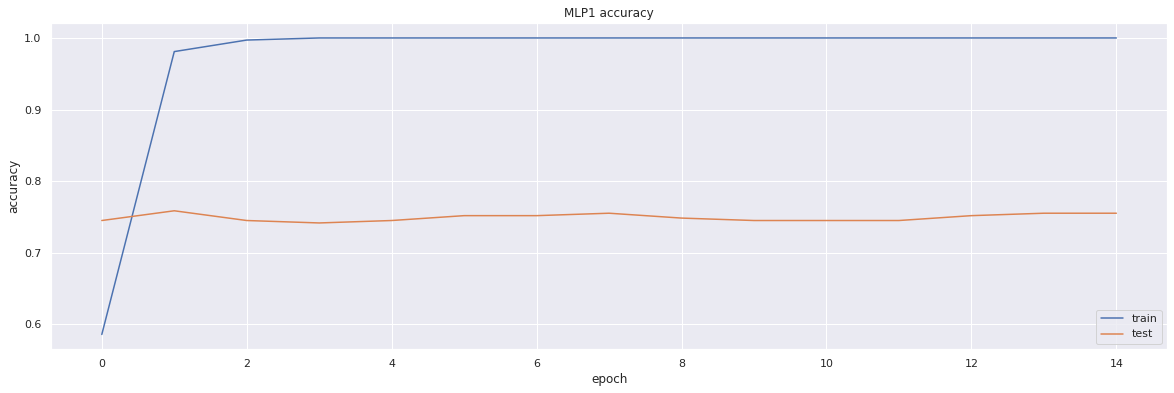

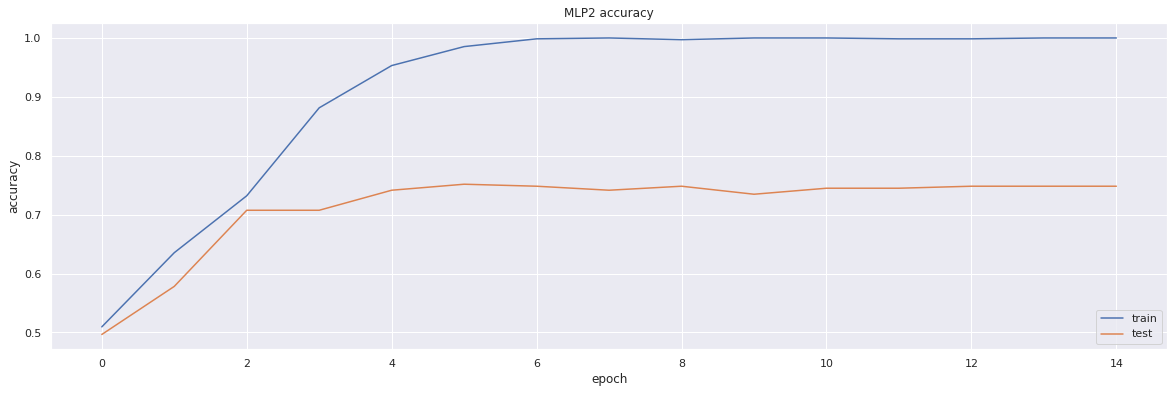

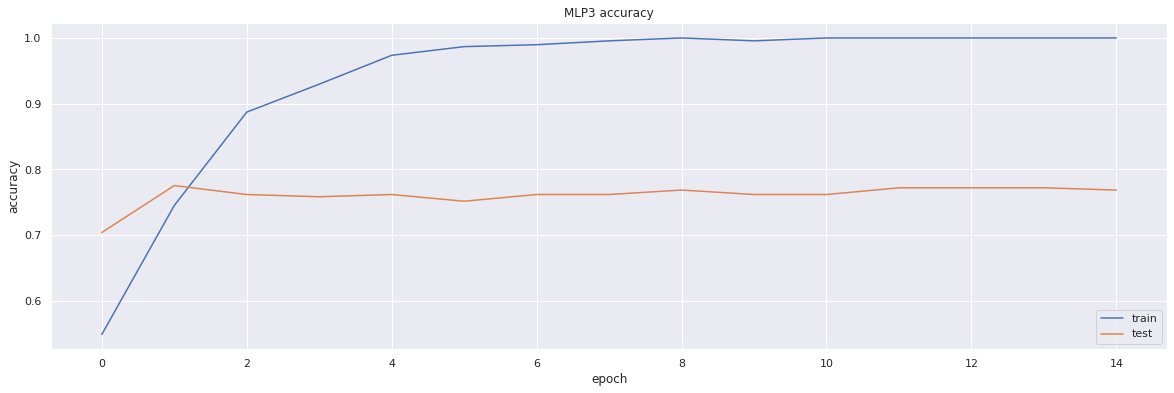

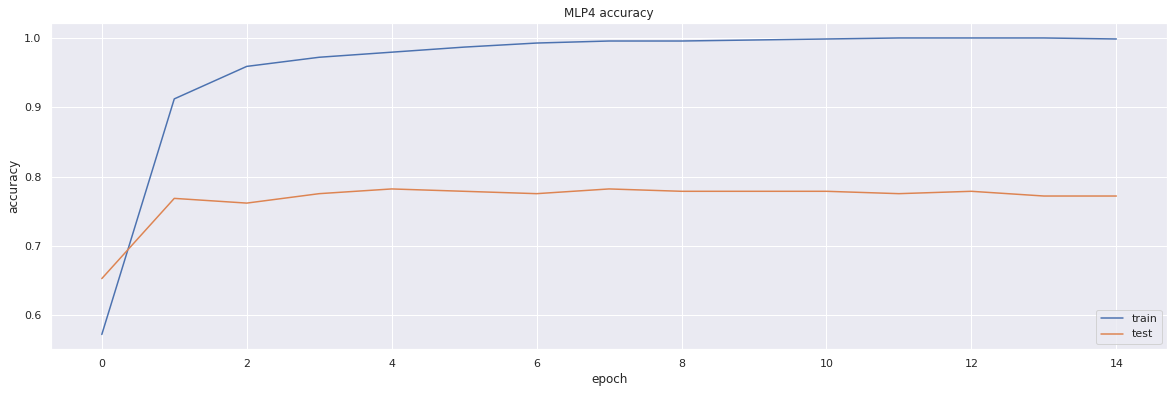

In [ ]:
#MLP1
plt.plot(history1.history[ 'accuracy' ])
plt.plot(history1.history[ 'val_accuracy' ])
plt.title( 'MLP1 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

#MLP2
plt.plot(history2.history[ 'accuracy' ])
plt.plot(history2.history[ 'val_accuracy' ])
plt.title( 'MLP2 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

#MLP3
plt.plot(history3.history[ 'accuracy' ])
plt.plot(history3.history[ 'val_accuracy' ])
plt.title( 'MLP3 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

#MLP4
plt.plot(history4.history[ 'accuracy' ])
plt.plot(history4.history[ 'val_accuracy' ])
plt.title( 'MLP4 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

In [ ]:
#MLP1
mlp_predict1=model1.predict(test_x)
for id, p in enumerate(mlp_predict1):
  if p>=0.5:
    mlp_predict1[id]=1
  else:
    mlp_predict1[id]=0
acc_mlp1=accuracy_score(test_y,mlp_predict1)
result_mlp1=precision_recall_fscore_support(test_y,mlp_predict1,average=None)
cm_mlp1=confusion_matrix(test_y,mlp_predict1)
aucroc_mlp1=roc_auc_score(test_y,mlp_predict1, average=None)

#MLP2
mlp_predict2=model2.predict(test_x)
for id, p in enumerate(mlp_predict2):
  if p>=0.5:
    mlp_predict2[id]=1
  else:
    mlp_predict2[id]=0
acc_mlp2=accuracy_score(test_y,mlp_predict2)
result_mlp2=precision_recall_fscore_support(test_y,mlp_predict2,average=None)
cm_mlp2=confusion_matrix(test_y,mlp_predict2)
aucroc_mlp2=roc_auc_score(test_y,mlp_predict2, average=None)

#MLP3
mlp_predict3=model3.predict(test_x)
for id, p in enumerate(mlp_predict3):
  if p>=0.5:
    mlp_predict3[id]=1
  else:
    mlp_predict3[id]=0
acc_mlp3=accuracy_score(test_y,mlp_predict3)
result_mlp3=precision_recall_fscore_support(test_y,mlp_predict3,average=None)
cm_mlp3=confusion_matrix(test_y,mlp_predict3)
aucroc_mlp3=roc_auc_score(test_y,mlp_predict3, average=None)

#MLP4
mlp_predict4=model4.predict(test_x)
for id, p in enumerate(mlp_predict4):
  if p>=0.5:
    mlp_predict4[id]=1
  else:
    mlp_predict4[id]=0
acc_mlp4=accuracy_score(test_y,mlp_predict4)
result_mlp4=precision_recall_fscore_support(test_y,mlp_predict4,average=None)
cm_mlp4=confusion_matrix(test_y,mlp_predict4)
aucroc_mlp4=roc_auc_score(test_y,mlp_predict4, average=None)

#Accuracy
print("Accuracy")
table=PrettyTable(['Method', 'Accuracy'])
table.add_row(['MLP 4 layer without dropout', acc_mlp1])
table.add_row(['MLP 4 layer with dropout', acc_mlp2])
table.add_row(['MLP 3 layer', acc_mlp3])
table.add_row(['MLP 2 layer', acc_mlp4])
print(table)

Accuracy
+-----------------------------+----------+
|            Method           | Accuracy |
+-----------------------------+----------+
| MLP 4 layer without dropout |   0.76   |
|   MLP 4 layer with dropout  |   0.86   |
|         MLP 3 layer         |   0.81   |
|         MLP 2 layer         |   0.79   |
+-----------------------------+----------+


## Test result

In [ ]:
#testing


#Precision
print("\nPrecision")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['MLP 4 layer without dropout']+result_mlp1[0].ravel().tolist())
table.add_row(['MLP 4 layer with dropout']+result_mlp2[0].ravel().tolist())
table.add_row(['MLP 3 layer']+result_mlp3[0].ravel().tolist())
table.add_row(['MLP 2 layer']+result_mlp4[0].ravel().tolist())
print(table)

#F1 score
print("\nF1 score")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['MLP 4 layer without dropout']+result_mlp1[2].ravel().tolist())
table.add_row(['MLP 4 layer with dropout']+result_mlp2[2].ravel().tolist())
table.add_row(['MLP 3 layer']+result_mlp3[2].ravel().tolist())
table.add_row(['MLP 2 layer']+result_mlp4[2].ravel().tolist())
print(table)

#ROC AUC score
print("\nROC AUC score")
table=PrettyTable(['Method', 'ROC AUC score'])
table.add_row(['MLP 4 layer without dropout',aucroc_mlp1])
table.add_row(['MLP 4 layer with dropout',aucroc_mlp2])
table.add_row(['MLP 3 layer',aucroc_mlp3])
table.add_row(['MLP 2 layer',aucroc_mlp4])
print(table)


Precision
+-----------------------------+--------------------+--------------------+
|            Method           |    not popular     |      popular       |
+-----------------------------+--------------------+--------------------+
| MLP 4 layer without dropout |        0.8         | 0.7272727272727273 |
|   MLP 4 layer with dropout  | 0.8936170212765957 | 0.8301886792452831 |
|         MLP 3 layer         | 0.8478260869565217 | 0.7777777777777778 |
|         MLP 2 layer         |        0.8         |        0.78        |
+-----------------------------+--------------------+--------------------+

F1 score
+-----------------------------+--------------------+--------------------+
|            Method           |    not popular     |      popular       |
+-----------------------------+--------------------+--------------------+
| MLP 4 layer without dropout | 0.7500000000000001 | 0.7692307692307693 |
|   MLP 4 layer with dropout  | 0.8571428571428571 | 0.8627450980392157 |
|         MLP 3 l

In [ ]:
def plot_roc_curve(fper, tper, title):
    plt.figure(figsize=(6,6))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    
    plt.legend()
    plt.show()

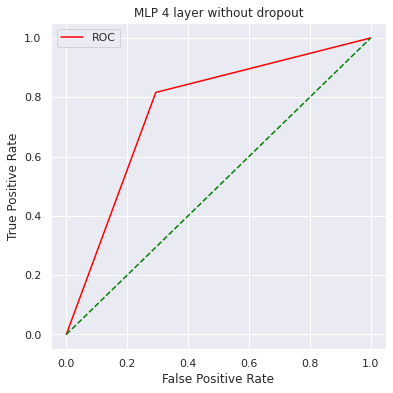

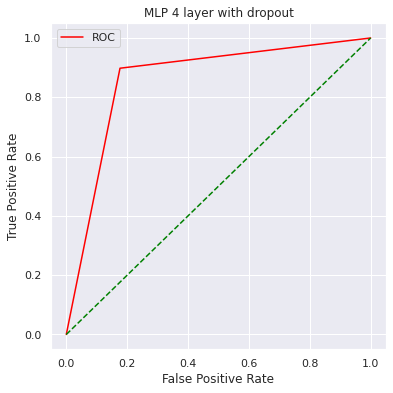

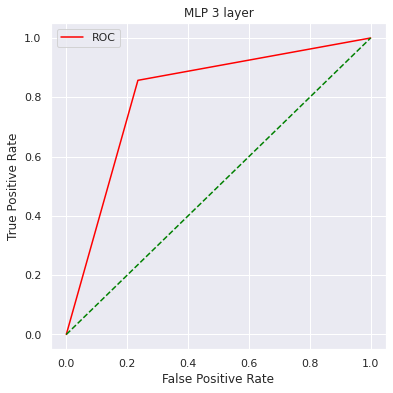

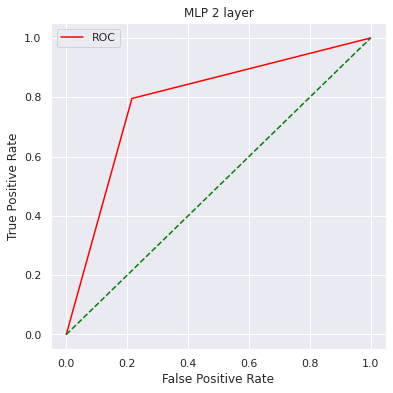

In [ ]:
# ROC curve

#MLP1
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict1)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 4 layer without dropout")

#MLP2
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict2)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 4 layer with dropout")

#MLP3
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict3)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 3 layer")

#MLP4
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict4)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 2 layer")

Text(48.5, 0.5, 'true value')

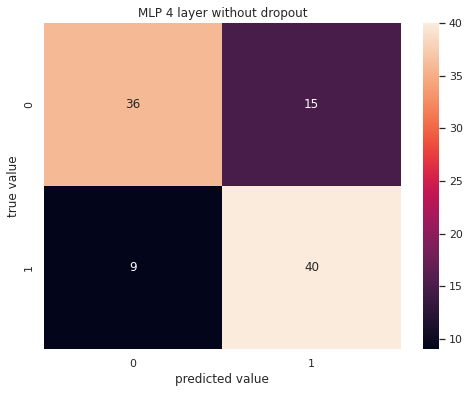

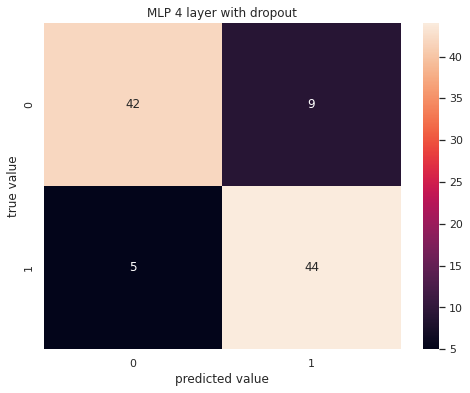

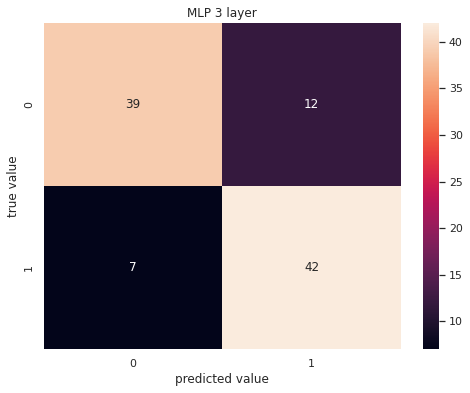

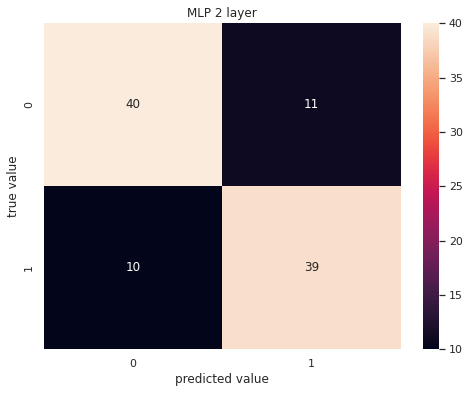

In [ ]:
#Confusion Matrix


#MLP1
plt.figure(figsize=(8,6))
plt.title("MLP 4 layer without dropout")
sns.heatmap(cm_mlp1, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#MLP2
plt.figure(figsize=(8,6))
plt.title("MLP 4 layer with dropout")
sns.heatmap(cm_mlp2, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#MLP3
plt.figure(figsize=(8,6))
plt.title("MLP 3 layer")
sns.heatmap(cm_mlp3, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#MLP4
plt.figure(figsize=(8,6))
plt.title("MLP 2 layer")
sns.heatmap(cm_mlp4, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

# 結合文字跟categorical feature

In [ ]:
from scipy.sparse import coo_matrix,hstack
from sklearn import preprocessing

In [ ]:
lb_anonymousSchool = preprocessing.LabelBinarizer(sparse_output=True)
anonymousSchool = lb_anonymousSchool.fit_transform(all_data['anonymousSchool'])

lb_anonymousDepartment = preprocessing.LabelBinarizer(sparse_output=True)
anonymousDepartment = lb_anonymousDepartment.fit_transform(all_data['anonymousDepartment'])

lb_gender = preprocessing.LabelBinarizer(sparse_output=True)
gender = lb_gender.fit_transform(all_data['gender'])

lb_forumName = preprocessing.LabelBinarizer(sparse_output=True)
forumName = lb_forumName.fit_transform(all_data['forumName'])


In [ ]:
tfidf_content = CountVectorizer()
content = tfidf_content.fit_transform(all_data['content'])

tfidf_transformer = TfidfTransformer()
content = tfidf_transformer.fit_transform(content)

In [ ]:
all_x = hstack((anonymousSchool, anonymousDepartment, gender, forumName, content)).tocsr() #0.68


#train/test
train_x = all_x[100:]
test_x = all_x[0:100]


### MLP

In [ ]:
#transform to np array
x=train_x.toarray()
y=np.array(train_y)

MLP1: 4 layer without dropout

In [ ]:
#MLP1

model1 = Sequential()
model1.add(Dense(128, input_dim=all_x.shape[1], activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential_122"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_393 (Dense)           (None, 128)               4140800   
                                                                 
 dense_394 (Dense)           (None, 64)                8256      
                                                                 
 dense_395 (Dense)           (None, 32)                2080      
                                                                 
 dense_396 (Dense)           (None, 1)                 33        
                                                                 
Total params: 4,151,169
Trainable params: 4,151,169
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history1=model1.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 2s 47ms/step - loss: 0.6807 - accuracy: 0.6925 - val_loss: 0.6537 - val_accuracy: 0.7857
Epoch 2/15
22/22 [==============================] - 1s 37ms/step - loss: 0.4778 - accuracy: 0.9707 - val_loss: 0.4816 - val_accuracy: 0.7857
Epoch 3/15
22/22 [==============================] - 1s 38ms/step - loss: 0.1045 - accuracy: 0.9868 - val_loss: 0.4183 - val_accuracy: 0.7857
Epoch 4/15
22/22 [==============================] - 1s 38ms/step - loss: 0.0097 - accuracy: 0.9985 - val_loss: 0.4649 - val_accuracy: 0.8129
Epoch 5/15
22/22 [==============================] - 1s 36ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4443 - val_accuracy: 0.7891
Epoch 6/15
22/22 [==============================] - 1s 40ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4483 - val_accuracy: 0.7993
Epoch 7/15
22/22 [==============================] - 1s 37ms/step - loss: 9.6727e-04 - accuracy: 1.0000 - val_loss: 0.4660 - val_accuracy: 0.7925
Epoch 8/1

MLP2: 4 layer with dropout

In [ ]:
#MLP2

model2 = Sequential()
model2.add(Dense(128, input_dim=all_x.shape[1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_123"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_397 (Dense)           (None, 128)               4140800   
                                                                 
 dropout_182 (Dropout)       (None, 128)               0         
                                                                 
 dense_398 (Dense)           (None, 64)                8256      
                                                                 
 dropout_183 (Dropout)       (None, 64)                0         
                                                                 
 dense_399 (Dense)           (None, 32)                2080      
                                                                 
 dropout_184 (Dropout)       (None, 32)                0         
                                                                 
 dense_400 (Dense)           (None, 1)              

In [ ]:
#compile
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history2=model2.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 2s 47ms/step - loss: 0.6927 - accuracy: 0.5212 - val_loss: 0.6886 - val_accuracy: 0.7075
Epoch 2/15
22/22 [==============================] - 1s 38ms/step - loss: 0.6802 - accuracy: 0.6515 - val_loss: 0.6684 - val_accuracy: 0.7823
Epoch 3/15
22/22 [==============================] - 1s 37ms/step - loss: 0.6184 - accuracy: 0.7936 - val_loss: 0.5862 - val_accuracy: 0.7823
Epoch 4/15
22/22 [==============================] - 1s 36ms/step - loss: 0.4325 - accuracy: 0.8843 - val_loss: 0.4746 - val_accuracy: 0.7857
Epoch 5/15
22/22 [==============================] - 1s 35ms/step - loss: 0.1980 - accuracy: 0.9546 - val_loss: 0.4533 - val_accuracy: 0.7993
Epoch 6/15
22/22 [==============================] - 1s 38ms/step - loss: 0.0892 - accuracy: 0.9854 - val_loss: 0.4815 - val_accuracy: 0.8095
Epoch 7/15
22/22 [==============================] - 1s 35ms/step - loss: 0.0447 - accuracy: 0.9941 - val_loss: 0.5098 - val_accuracy: 0.8027
Epoch 8/15
22

MLP3: 3 layer

In [ ]:
#MLP3

model3 = Sequential()
model3.add(Dense(64, input_dim=all_x.shape[1], activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_124"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_401 (Dense)           (None, 64)                2070400   
                                                                 
 dropout_185 (Dropout)       (None, 64)                0         
                                                                 
 dense_402 (Dense)           (None, 32)                2080      
                                                                 
 dropout_186 (Dropout)       (None, 32)                0         
                                                                 
 dense_403 (Dense)           (None, 1)                 33        
                                                                 
Total params: 2,072,513
Trainable params: 2,072,513
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history3=model3.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 1s 33ms/step - loss: 0.6899 - accuracy: 0.5476 - val_loss: 0.6818 - val_accuracy: 0.5782
Epoch 2/15
22/22 [==============================] - 1s 26ms/step - loss: 0.6555 - accuracy: 0.6720 - val_loss: 0.6522 - val_accuracy: 0.6769
Epoch 3/15
22/22 [==============================] - 1s 25ms/step - loss: 0.5732 - accuracy: 0.7892 - val_loss: 0.5957 - val_accuracy: 0.7449
Epoch 4/15
22/22 [==============================] - 1s 29ms/step - loss: 0.4456 - accuracy: 0.9239 - val_loss: 0.5180 - val_accuracy: 0.7687
Epoch 5/15
22/22 [==============================] - 1s 31ms/step - loss: 0.3046 - accuracy: 0.9531 - val_loss: 0.4425 - val_accuracy: 0.8265
Epoch 6/15
22/22 [==============================] - 1s 24ms/step - loss: 0.1789 - accuracy: 0.9722 - val_loss: 0.4069 - val_accuracy: 0.8265
Epoch 7/15
22/22 [==============================] - 1s 25ms/step - loss: 0.1007 - accuracy: 0.9898 - val_loss: 0.4057 - val_accuracy: 0.8027
Epoch 8/15
22

MLP4: 2 layer

In [ ]:
#MLP4

model4 = Sequential()
model4.add(Dense(64, input_dim=all_x.shape[1], activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

model4.summary()

Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_404 (Dense)           (None, 64)                2070400   
                                                                 
 dropout_187 (Dropout)       (None, 64)                0         
                                                                 
 dense_405 (Dense)           (None, 1)                 65        
                                                                 
Total params: 2,070,465
Trainable params: 2,070,465
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compile
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

history4=model4.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
22/22 [==============================] - 1s 31ms/step - loss: 0.6861 - accuracy: 0.6179 - val_loss: 0.6745 - val_accuracy: 0.7483
Epoch 2/15
22/22 [==============================] - 0s 23ms/step - loss: 0.6316 - accuracy: 0.8990 - val_loss: 0.6381 - val_accuracy: 0.7551
Epoch 3/15
22/22 [==============================] - 1s 24ms/step - loss: 0.5367 - accuracy: 0.9429 - val_loss: 0.5932 - val_accuracy: 0.7755
Epoch 4/15
22/22 [==============================] - 1s 23ms/step - loss: 0.4302 - accuracy: 0.9649 - val_loss: 0.5503 - val_accuracy: 0.7857
Epoch 5/15
22/22 [==============================] - 1s 23ms/step - loss: 0.3321 - accuracy: 0.9766 - val_loss: 0.5171 - val_accuracy: 0.7755
Epoch 6/15
22/22 [==============================] - 0s 22ms/step - loss: 0.2495 - accuracy: 0.9839 - val_loss: 0.4915 - val_accuracy: 0.7789
Epoch 7/15
22/22 [==============================] - 1s 24ms/step - loss: 0.1901 - accuracy: 0.9927 - val_loss: 0.4707 - val_accuracy: 0.7857
Epoch 8/15
22

### MLP Test Result Compare
training history

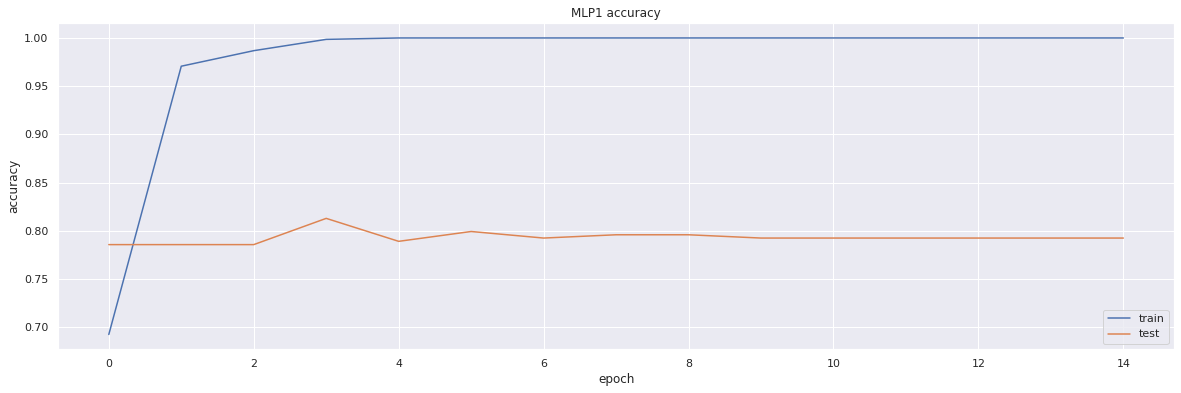

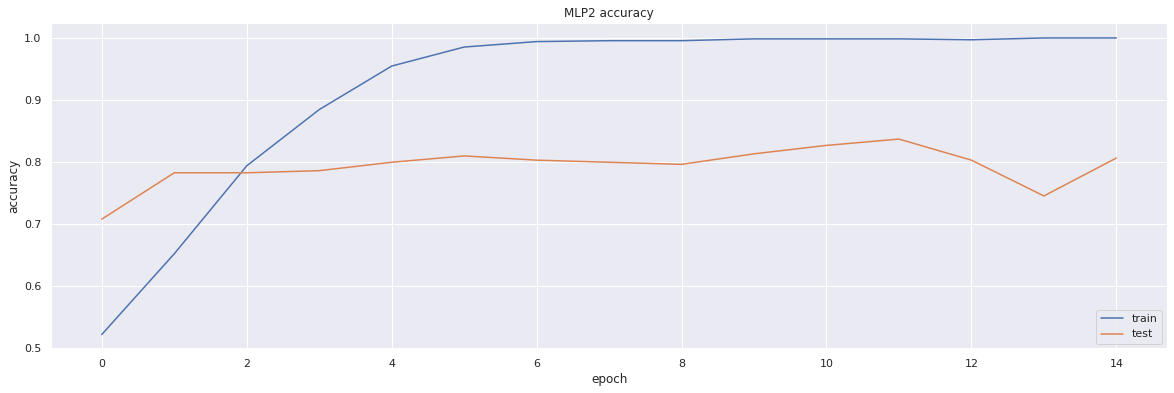

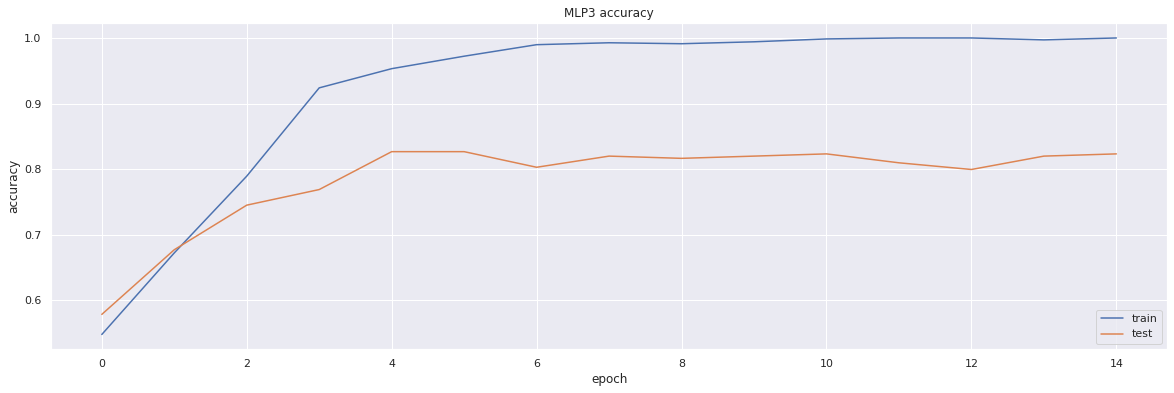

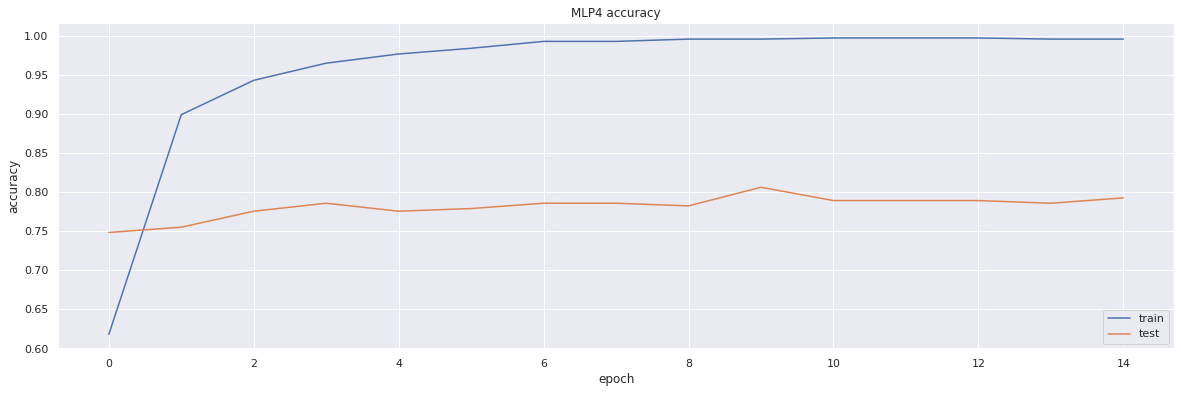

In [ ]:
#MLP1
plt.plot(history1.history[ 'accuracy' ])
plt.plot(history1.history[ 'val_accuracy' ])
plt.title( 'MLP1 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

#MLP2
plt.plot(history2.history[ 'accuracy' ])
plt.plot(history2.history[ 'val_accuracy' ])
plt.title( 'MLP2 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

#MLP3
plt.plot(history3.history[ 'accuracy' ])
plt.plot(history3.history[ 'val_accuracy' ])
plt.title( 'MLP3 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

#MLP4
plt.plot(history4.history[ 'accuracy' ])
plt.plot(history4.history[ 'val_accuracy' ])
plt.title( 'MLP4 accuracy' )
plt.ylabel( 'accuracy' )
plt.xlabel( 'epoch' )
plt.legend([ 'train' , 'test' ], loc= 'lower right' )
plt.show()

In [ ]:
#MLP1
mlp_predict1=model1.predict(test_x)
for id, p in enumerate(mlp_predict1):
  if p>=0.5:
    mlp_predict1[id]=1
  else:
    mlp_predict1[id]=0
acc_mlp1=accuracy_score(test_y,mlp_predict1)
result_mlp1=precision_recall_fscore_support(test_y,mlp_predict1,average=None)
cm_mlp1=confusion_matrix(test_y,mlp_predict1)
aucroc_mlp1=roc_auc_score(test_y,mlp_predict1, average=None)

#MLP2
mlp_predict2=model2.predict(test_x)
for id, p in enumerate(mlp_predict2):
  if p>=0.5:
    mlp_predict2[id]=1
  else:
    mlp_predict2[id]=0
acc_mlp2=accuracy_score(test_y,mlp_predict2)
result_mlp2=precision_recall_fscore_support(test_y,mlp_predict2,average=None)
cm_mlp2=confusion_matrix(test_y,mlp_predict2)
aucroc_mlp2=roc_auc_score(test_y,mlp_predict2, average=None)

#MLP3
mlp_predict3=model3.predict(test_x)
for id, p in enumerate(mlp_predict3):
  if p>=0.5:
    mlp_predict3[id]=1
  else:
    mlp_predict3[id]=0
acc_mlp3=accuracy_score(test_y,mlp_predict3)
result_mlp3=precision_recall_fscore_support(test_y,mlp_predict3,average=None)
cm_mlp3=confusion_matrix(test_y,mlp_predict3)
aucroc_mlp3=roc_auc_score(test_y,mlp_predict3, average=None)

#MLP4
mlp_predict4=model4.predict(test_x)
for id, p in enumerate(mlp_predict4):
  if p>=0.5:
    mlp_predict4[id]=1
  else:
    mlp_predict4[id]=0
acc_mlp4=accuracy_score(test_y,mlp_predict4)
result_mlp4=precision_recall_fscore_support(test_y,mlp_predict4,average=None)
cm_mlp4=confusion_matrix(test_y,mlp_predict4)
aucroc_mlp4=roc_auc_score(test_y,mlp_predict4, average=None)

#Accuracy
print("Accuracy")
table=PrettyTable(['Method', 'Accuracy'])
table.add_row(['MLP 4 layer without dropout', acc_mlp1])
table.add_row(['MLP 4 layer with dropout', acc_mlp2])
table.add_row(['MLP 3 layer', acc_mlp3])
table.add_row(['MLP 2 layer', acc_mlp4])
print(table)

Accuracy
+-----------------------------+----------+
|            Method           | Accuracy |
+-----------------------------+----------+
| MLP 4 layer without dropout |   0.81   |
|   MLP 4 layer with dropout  |   0.87   |
|         MLP 3 layer         |   0.82   |
|         MLP 2 layer         |   0.82   |
+-----------------------------+----------+


## Test result

In [ ]:
#testing


#Precision
print("\nPrecision")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['MLP 4 layer without dropout']+result_mlp1[0].ravel().tolist())
table.add_row(['MLP 4 layer with dropout']+result_mlp2[0].ravel().tolist())
table.add_row(['MLP 3 layer']+result_mlp3[0].ravel().tolist())
table.add_row(['MLP 2 layer']+result_mlp4[0].ravel().tolist())
print(table)

#F1 score
print("\nF1 score")
table=PrettyTable(['Method', 'not popular','popular'])
table.add_row(['MLP 4 layer without dropout']+result_mlp1[2].ravel().tolist())
table.add_row(['MLP 4 layer with dropout']+result_mlp2[2].ravel().tolist())
table.add_row(['MLP 3 layer']+result_mlp3[2].ravel().tolist())
table.add_row(['MLP 2 layer']+result_mlp4[2].ravel().tolist())
print(table)

#ROC AUC score
print("\nROC AUC score")
table=PrettyTable(['Method', 'ROC AUC score'])
table.add_row(['MLP 4 layer without dropout',aucroc_mlp1])
table.add_row(['MLP 4 layer with dropout',aucroc_mlp2])
table.add_row(['MLP 3 layer',aucroc_mlp3])
table.add_row(['MLP 2 layer',aucroc_mlp4])
print(table)


Precision
+-----------------------------+--------------------+--------------------+
|            Method           |    not popular     |      popular       |
+-----------------------------+--------------------+--------------------+
| MLP 4 layer without dropout | 0.8076923076923077 |       0.8125       |
|   MLP 4 layer with dropout  | 0.9318181818181818 | 0.8214285714285714 |
|         MLP 3 layer         | 0.8113207547169812 | 0.8297872340425532 |
|         MLP 2 layer         | 0.8235294117647058 | 0.8163265306122449 |
+-----------------------------+--------------------+--------------------+

F1 score
+-----------------------------+--------------------+--------------------+
|            Method           |    not popular     |      popular       |
+-----------------------------+--------------------+--------------------+
| MLP 4 layer without dropout | 0.8155339805825242 | 0.8041237113402061 |
|   MLP 4 layer with dropout  | 0.8631578947368421 | 0.8761904761904763 |
|         MLP 3 l

In [ ]:
def plot_roc_curve(fper, tper, title):
    plt.figure(figsize=(6,6))
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    
    plt.legend()
    plt.show()

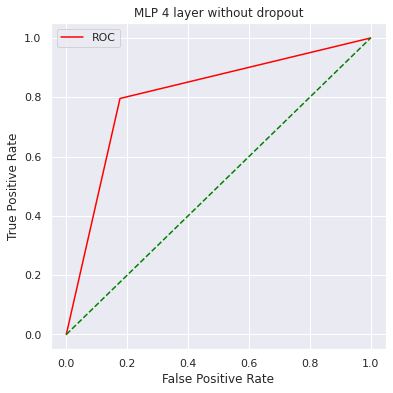

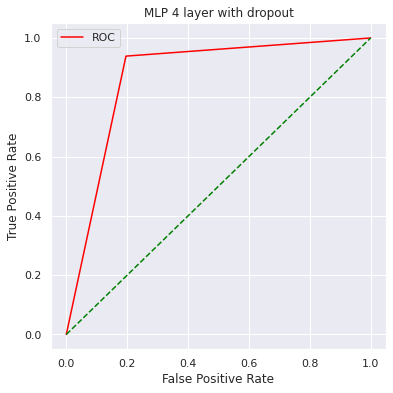

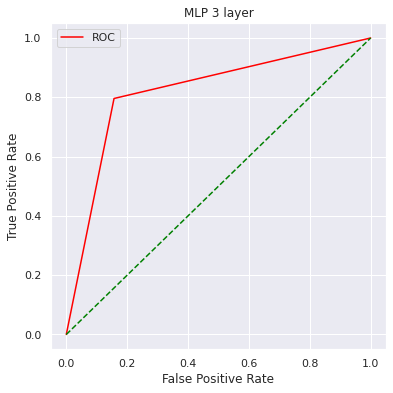

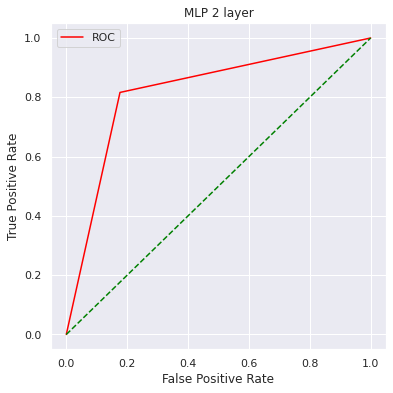

In [ ]:
# ROC curve

#MLP1
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict1)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 4 layer without dropout")

#MLP2
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict2)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 4 layer with dropout")

#MLP3
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict3)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 3 layer")

#MLP4
mlp_fper, mlp_tper, thresholds = roc_curve(test_y, mlp_predict4)
plot_roc_curve(mlp_fper, mlp_tper, "MLP 2 layer")

Text(48.5, 0.5, 'true value')

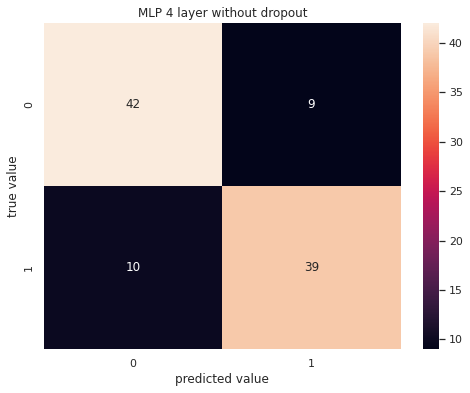

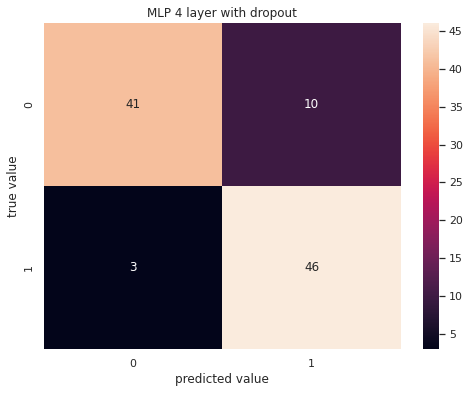

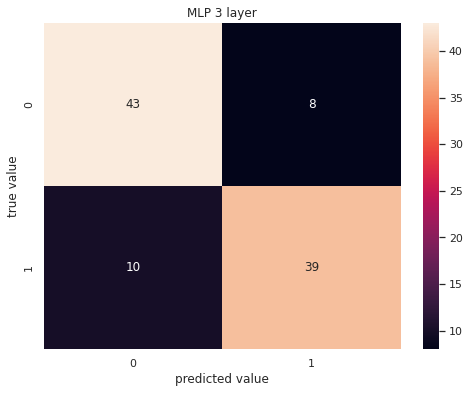

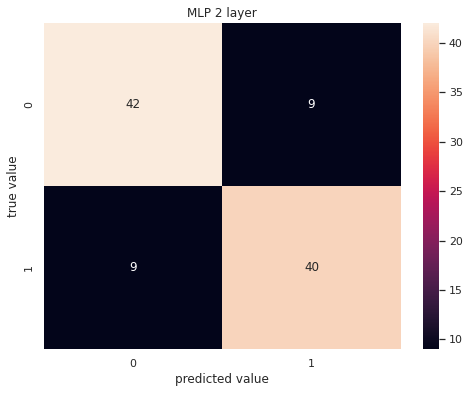

In [ ]:
#Confusion Matrix


#MLP1
plt.figure(figsize=(8,6))
plt.title("MLP 4 layer without dropout")
sns.heatmap(cm_mlp1, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#MLP2
plt.figure(figsize=(8,6))
plt.title("MLP 4 layer with dropout")
sns.heatmap(cm_mlp2, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#MLP3
plt.figure(figsize=(8,6))
plt.title("MLP 3 layer")
sns.heatmap(cm_mlp3, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")

#MLP4
plt.figure(figsize=(8,6))
plt.title("MLP 2 layer")
sns.heatmap(cm_mlp4, annot=True, fmt=".0f")
plt.xlabel("predicted value")
plt.ylabel("true value")